In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("news_dataset.csv", encoding = "ISO-8859-1")
df.head()
df = df.sample(frac=1)
df[["title","label"]].head(20)


,title,label
8512,The Clinton Email Investigation Has Shifted Th...,fake
15006,The messy truth about the gulf between Trump a...,real
21696,"After Voters Reject Peace Deal With FARC, What...",real
13008,"Get to Know the Historical Figures on the $5, ...",real
4197,Emigre Super Bloc Part VII: Why Hillary Clinto...,fake
4859,Defying the Politics of Fear :,fake
19610,The Bushwhacking of Trump,real
1451,NaN,fake
1626,Robotic Advancements & Mars/ Ancient Aliens,fake
25218,Brazil mourns Chapecoense crash victims at pac...,real


In [3]:

################################ packages #################################################
import pandas as pd
import numpy as np
import pickle
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import string
import nltk
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer


#########################################################################################


#loading the dataset
df = pd.read_csv("news_dataset.csv", encoding = "ISO-8859-1")
df_news = df[['title','label']]
print("The shape of the loaded datatset:"+ str(df_news.shape))
#shuffle the data
df_news = df_news.sample(frac=1)
# fill the null values
df_news.title.fillna("", inplace=True)
def pre_process(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    ls = []
    for word in text.split():
        if word.lower():
            if word not in stopwords.words('english'):
                ls.append(word)
        else:
            word = word.lower()
            if word not in stopwords.words("english"):
                ls.append(word)
    words = ""
    for i in ls:
            stemmer = SnowballStemmer("english")
            words += (stemmer.stem(i))+ " "
    return(words)
features   = df_news["title"].copy()
features   = features.apply(pre_process)
vectorizer = TfidfVectorizer("english")
features   = vectorizer.fit_transform(features)

The shape of the loaded datatset:(28711, 2)


In [4]:
features.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
d = {}
for i in df_news["label"]:
    if i in d:
        d[i] = d[i]+1
    else:
        d[i] = 1
print(d)

{'real': 15712, 'fake': 12999}


([<matplotlib.axis.XTick at 0x1a2167ff98>,
 <a list of 2 Text xticklabel objects>)

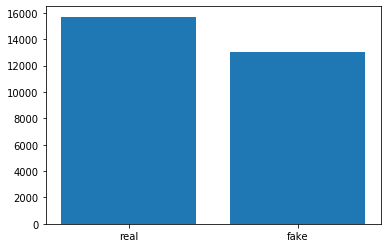

In [6]:
import matplotlib.pyplot as plt

plt.bar(range(len(d)), list(d.values()), align='center')
plt.xticks(range(len(d)), list(d.keys()))

In [7]:
12999/(12999+15712)

0.4527533001288705

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features, df_news['label'], test_size=0.25)

In [11]:
X_train.shape[0]

21533

In [250]:
#X_train.shape
features.shape

(28711, 22245)

In [251]:
print(type(features))

<class 'scipy.sparse.csr.csr_matrix'>


In [258]:
class LogisticRegression:
    def logistic_func(self,beta, X): 
        return 1.0/(1 + np.exp(-np.dot(X, beta.T))) 
  
  
    def log_gradient(self,beta, X, y): 
        
        first_calc = logistic_func(beta, X) - y.reshape(X.shape[0], -1) 
        final_calc = np.dot(first_calc.T, X) 
        return final_calc 


    def cost_func(self,beta, X, y): 
        
        log_func_v = self.logistic_func(beta, X) 
        y = np.squeeze(y) 
        step1 = y * np.log(log_func_v) 
        step2 = (1 - y) * np.log(1 - log_func_v) 
        final = -step1 - step2 
        return np.mean(final) 


    def grad_desc(self,X, y, beta, lr=.01, converge_change=.001): 
        
        cost = self.cost_func(beta, X, y) 
        change_cost = 1
        num_iter = 1

        while(change_cost > converge_change): 
            old_cost = cost 
            beta = beta - (lr * log_gradient(beta, X, y)) 
            cost = cost_func(beta, X, y) 
            change_cost = old_cost - cost 
            num_iter += 1

        return beta, num_iter  


    def pred_values(self,beta, X): 
        
        pred_prob = logistic_func(beta, X) 
        pred_value = np.where(pred_prob >= .5, 1, 0) 
        return np.squeeze(pred_value) 


In [253]:
features = pd.DataFrame(features.toarray())
features = features.to_numpy()

In [259]:
X_train, X_test, y_train, y_test = train_test_split(features, df_news['label'], test_size=0.25)

In [230]:
'''
class LogisticRegression:
    def __init__(self, lr=0.015, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept

    def add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
            
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

    def fit(self, X, y):
        if self.fit_intercept:
            X = self.add_intercept(X)

        # Initiallizing weights
        self.theta = np.zeros(X.shape[1])

        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta = self.theta - self.lr * gradient

            if(self.verbose == True and i % 10000 == 0):
                z = np.dot(X, self.theta)
                h = self.sigmoid(z)
                #print(f'loss: {self.__loss(h, y)} \t')

    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.add_intercept(X)

        return self.sigmoid(np.dot(X, self.theta))

    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold


clf = LogisticRegression().fit(X_train, y_train)

y_pred = clf.predict(X_test)
'''

"\nclass LogisticRegression:\n    def __init__(self, lr=0.015, num_iter=100000, fit_intercept=True, verbose=False):\n        self.lr = lr\n        self.num_iter = num_iter\n        self.fit_intercept = fit_intercept\n\n    def add_intercept(self, X):\n        intercept = np.ones((X.shape[0], 1))\n        return np.concatenate((intercept, X), axis=1)\n\n    def sigmoid(self, z):\n        return 1 / (1 + np.exp(-z))\n            \n    def __loss(self, h, y):\n        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()\n\n    def fit(self, X, y):\n        if self.fit_intercept:\n            X = self.add_intercept(X)\n\n        # Initiallizing weights\n        self.theta = np.zeros(X.shape[1])\n\n        for i in range(self.num_iter):\n            z = np.dot(X, self.theta)\n            h = self.sigmoid(z)\n            gradient = np.dot(X.T, (h - y)) / y.size\n            self.theta = self.theta - self.lr * gradient\n\n            if(self.verbose == True and i % 10000 == 0):\n         

(21533, 22245)

In [ ]:
clf = LogisticRegression().fit(X_train, y_train)

In [136]:
with open('/Users/chanukya/Documents/GitHub/DataMining/Project/Project/Fakenews/youtubeexplorer/model.py','wb') as f:
    pickle.dump(clf, f)
    f.close()



In [137]:
y_pred = clf.predict(X_test)
y_pred

array(['real', 'fake', 'fake', ..., 'real', 'real', 'fake'], dtype=object)

In [138]:
accuracy_score(y_test,y_pred)

0.7847589857899137

In [139]:
y_result_test = []
for i in y_test:
    if i == "fake":
        y_result_test.append(1)
    else:
        y_result_test.append(0)
y_result_test = np.array(y_result_test)

In [140]:
y_result_train = []
for i in y_train:
    if i == "fake":
        y_result_train.append(1)
    else:
        y_result_train.append(0)
y_result_train = np.array(y_result_train)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.936


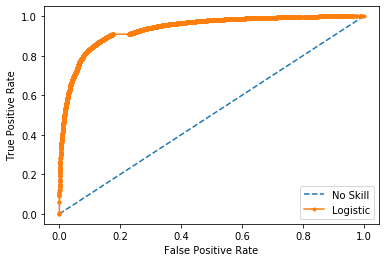

In [141]:
ns_probs = [0 for _ in range(len(y_train))]
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves

ns_fpr, ns_tpr, _ = roc_curve(y_result_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_result_train, lr_probs)
# plot the roc curve for the model

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot( lr_tpr,lr_fpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.857


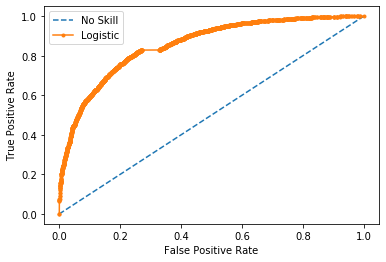

In [142]:
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves

ns_fpr, ns_tpr, _ = roc_curve(y_result_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_result_test, lr_probs)
# plot the roc curve for the model

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot( lr_tpr,lr_fpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()



### Cross- Validation

In [143]:
from sklearn.model_selection import cross_validate

In [144]:
clf = LogisticRegression()
cv_results = cross_validate(clf, features, df_news["label"], cv= 10)
cv_results['test_score']

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.78760446, 0.78238162, 0.8014629 , 0.80076628, 0.79101358,
       0.7882271 , 0.79275514, 0.79066527, 0.79972135, 0.78188153])

In [145]:
# From data we can infer that 100 fold cross validation 

In [146]:
##
Logistic = []
for i in range(len(y_pred)):
    if y_pred[i] == y_test.iloc[i]:
        Logistic.append("YES")
    else:
        Logistic.append("NO")


### Decision Tree

In [147]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [150]:

clf = DecisionTreeClassifier()
clf  = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)


0.7263861799944274

In [151]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test,y_pred,average='macro' )

(0.7226929568254497, 0.7224869146031518, 0.7225871010800013, None)

In [152]:
y_result_test = []
for i in y_test:
    if i == "fake":
        y_result_test.append(1)
    else:
        y_result_test.append(0)
y_result_test = np.array(y_result_test)

In [153]:
y_result_train = []
for i in y_train:
    if i == "fake":
        y_result_train.append(1)
    else:
        y_result_train.append(0)
y_result_train = np.array(y_result_train)

No Skill: ROC AUC=0.500
Decision_Tree: ROC AUC=1.000


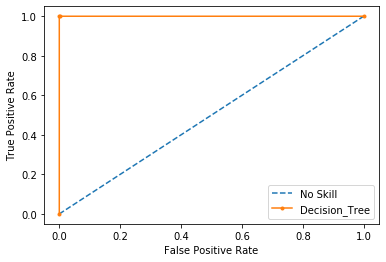

In [154]:
ns_probs = [0 for _ in range(len(y_train))]
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision_Tree: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves

ns_fpr, ns_tpr, _ = roc_curve(y_result_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_result_train, lr_probs)
# plot the roc curve for the model

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot( lr_tpr,lr_fpr, marker='.', label='Decision_Tree')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.722


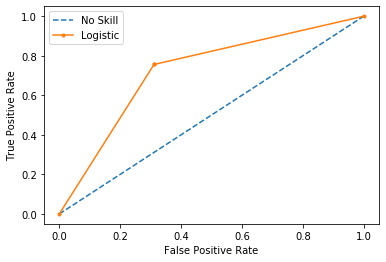

In [156]:
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves

ns_fpr, ns_tpr, _ = roc_curve(y_result_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_result_test, lr_probs)
# plot the roc curve for the model

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot( lr_tpr,lr_fpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


In [157]:
cv_results = cross_validate(clf, features, df_news["label"], cv= 10)
cv_results['test_score']

array([0.72667131, 0.73711699, 0.72657611, 0.72587948, 0.73702543,
       0.73807036, 0.73249739, 0.72378962, 0.74016022, 0.74529617])

In [158]:
Decision = []
for i in range(len(y_pred)):
    if y_pred[i] == y_test.iloc[i]:
        Decision.append("YES")
    else:
        Decision.append("NO")

In [159]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test,y_pred)

(array([0.69165085, 0.75373506]),
 array([0.68860202, 0.75637181]),
 array([0.69012307, 0.75505113]),
 array([3176, 4002]))

## Naive Bayes

In [160]:
clf = Naive.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)



0.7634438562273613

In [161]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test,y_pred,average='macro')

(0.7757893711018711, 0.7471420933110271, 0.7505155798959702, None)

In [162]:
cv_results = cross_validate(clf, features, df_news["label"], cv= 10)
cv_results['test_score']

array([0.7632312 , 0.76114206, 0.77603622, 0.77812609, 0.7718565 ,
       0.76837339, 0.758969  , 0.77011494, 0.7687217 , 0.76724739])

No Skill: ROC AUC=0.500
Naive_Bayes: ROC AUC=0.948


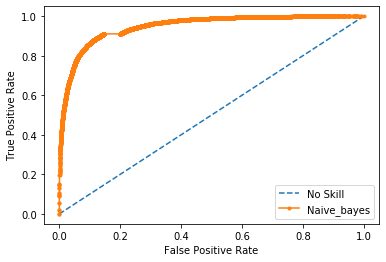

In [163]:
ns_probs = [0 for _ in range(len(y_train))]
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Naive_Bayes: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves

ns_fpr, ns_tpr, _ = roc_curve(y_result_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_result_train, lr_probs)
# plot the roc curve for the model

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot( lr_tpr,lr_fpr, marker='.', label='Naive_bayes')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Naive_Bayes: ROC AUC=0.860


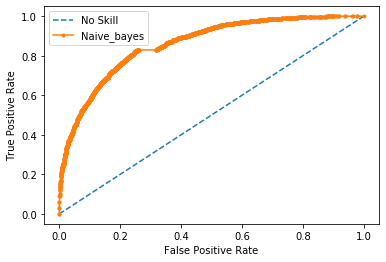

In [164]:
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Naive_Bayes: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves

ns_fpr, ns_tpr, _ = roc_curve(y_result_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_result_test, lr_probs)
# plot the roc curve for the model

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot( lr_tpr,lr_fpr, marker='.', label='Naive_bayes')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [165]:
NB = []
for i in range(len(y_pred)):
    if y_pred[i] == y_test.iloc[i]:
        NB.append("YES")
    else:
        NB.append("NO")

## KNN

In [120]:
model = KNeighborsClassifier(n_neighbors=100)
clf = model.fit(X_train[:8000],y_train[:8000])
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.45305098913346337

In [121]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test,y_pred, average='macro')

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.22652549456673168, 0.5, 0.3117929050814957, None)

No Skill: ROC AUC=0.500
KNN: ROC AUC=0.703


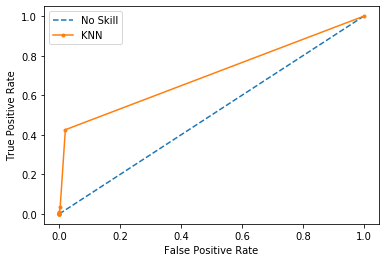

In [124]:
ns_probs = [0 for _ in range(len(y_train))]
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('KNN: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves

ns_fpr, ns_tpr, _ = roc_curve(y_result_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_result_train, lr_probs)
# plot the roc curve for the model

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot( lr_tpr,lr_fpr, marker='.', label='KNN')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
KNN: ROC AUC=0.523


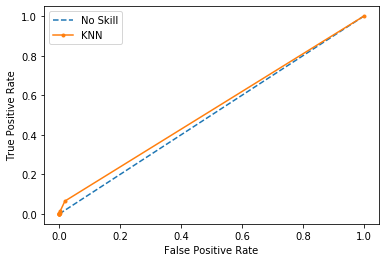

In [125]:
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('KNN: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves

ns_fpr, ns_tpr, _ = roc_curve(y_result_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_result_test, lr_probs)
# plot the roc curve for the model

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot( lr_tpr,lr_fpr, marker='.', label='KNN')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [126]:
cv_results = cross_validate(clf, features, df_news["label"], cv= 10)
cv_results['test_score']

array([0.45264624, 0.45264624, 0.4528039 , 0.4528039 , 0.4528039 ,
       0.4528039 , 0.4528039 , 0.4528039 , 0.4528039 , 0.45261324])

### McNemar’s Test

In [169]:
Final = {"Logistic": Logistic, "Decision": Decision, "NB":NB}

In [172]:
Final = pd.DataFrame(Final)
type(Final)

pandas.core.frame.DataFrame

In [192]:
YesYes = 0
YesNo  = 0
NoYes  = 0
NoNo   = 0

In [193]:
### Lets compate two classifiers NB and Logisitic as they are giving almost the same result.
Final.head(10)

,Logistic,Decision,NB
0,YES,YES,YES
1,YES,YES,YES
2,YES,NO,YES
3,YES,YES,YES
4,YES,YES,YES
5,YES,YES,YES
6,NO,YES,NO
7,YES,YES,YES
8,YES,YES,YES
9,NO,YES,YES


In [194]:

for i in range(Final.shape[0]):
    if Final["Logistic"].iloc[i] == "YES":
        if Final["NB"].iloc[i] == "YES":
            YesYes += 1
        else:
            YesNo += 1
    if Final["Logistic"].iloc[i] == "NO":
        if Final["NB"].iloc[i] == "YES":
            NoYes += 1
        else:
            NoNo += 1


In [195]:
ls1 = []
ls2 = []
McNemar_table = []
ls1.append(YesYes)
ls1.append(YesNo)
ls2.append(NoYes)
ls2.append(NoNo)
McNemar_table.append(ls1)
McNemar_table.append(ls2)

In [196]:
McNemar_table

[[5047, 586], [433, 1112]]

In [198]:
from statsmodels.stats.contingency_tables import mcnemar
result = mcnemar(McNemar_table, exact=False)
# summarize the finding
print('statistic=%.3f, p-value=%.3f' % (result.statistic, result.pvalue))
# interpret the p-value
alpha = 0.05
if result.pvalue > alpha:
	print('Same proportions of errors (fail to reject H0)')
else:
	print('Different proportions of errors (reject H0)')

statistic=22.673, p-value=0.000
Different proportions of errors (reject H0)


In [199]:
result.pvalue

1.9202665775050555e-06